# Intro

The goal in this note is to work with the data of COVID-19 cases to build and evaluate prediction models that capture the relationship between the descriptive features and the target feature death_yn.

The data has been cleaned from the original data provided by the Centers for Disease Control and Prevention (CDC: https://covid.cdc.gov/covid-data-tracker/) following the process below: 

|Variable Names|Data Quality Issue|Handling Strategy|Justification
|-|-|-|-
|case_month|No issue|-|-
|case_positive_specimen_interval|47% Missing|Leave as is|Too many are missing, but both imputation or dropping can affect the prediction
|case_positive_specimen_interval|Outliers|Leave as is|Most values are concentrated around zero, making all values that are different from 0 become ‘outliers’. This extraordinarily high frequency of 0 in a feature should be investigated, as the cause might be a serious error in data integration or manual entry.
|case_positive_specimen_interval|Negative value|Leave as is|Negative CPSI can mean that a case is tested positive BEFORE being reported to CDC (week of earliest date = week of earliest received date by CDC > week of first positive specimen collection date). This can have relations with target feature (late reporting can affect death outcome)
|case_onset_interval|57% Missing|Leave as is|Too many are missing, both imputation or dropping can affect the prediction
|case_onset_interval|Outliers|Leave as is|Most values are concentrated around zero, making all values that are different from 0 become ‘outliers’. This extraordinarily high frequency of 0 in a feature should be investigated, as the cause might be a serious error in data integration or manual entry.
|case_onset_interval|Negative value|Leave as is|Negative can mean that a case has first symptom onset before being clinically observed or before being reported to CDC (week of date of first symptom onset < week of earliest received date by CDC/first week of clinical date). This can have relations with target feature (late reporting can affect death outcome).
|res_state|0.0025% Missing|Imputed as 'Missing'|Match with CDC encoding when data is not provided
|state_fips_code|0.0025% Missing|Imputed as 'Missing'|Match with CDC encoding when data is not provided
|res_county	37583|6.0425% Missing|Imputed as 'Missing'|Match with CDC encoding when data is not provided
|county_fips_code|6.0425% Missing|Imputed as 'Missing'|Match with CDC encoding when data is not provided
|age_group|0.6400% Missing|Imputed as 'Missing'|Match with CDC encoding when data is not provided
|sex|1.9700% Missing|Imputed as 'Missing'|Match with CDC encoding when data is not provided
|race|11.6625% Missing|Imputed as 'Missing'|Match with CDC encoding when data is not provided
|ethnicity|12.6775% Missing|Imputed as 'Missing'|Match with CDC encoding when data is not provided
|process|No issue|Leave as is|CDC encodes non-provided data to 'Missing', not that the actual dataset is missing
|exposure_yn|No issue|Leave as is|CDC encode non-provided data to 'Missing', not that the actual dataset is missing
|current_status|No issue|Leave as is|-|
|symptom_status|No issue|Leave as is|CDC encode non-provided data to 'Missing', not that the actual dataset is missing.
|hosp_yn|No issue|Leave as is|CDC encode non-provided data to 'Missing', not that the actual dataset is missing
|icu_yn|No issue|Leave as is|CDC encode non-provided data to 'Missing', not that the actual dataset is missing 
|death_yn|No issue|Leave as is|-|
|underlying_conditions_yn|91.3225% Missing|Drop features|Too many are missing


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [8]:
#Load the dataset
df = pd.read_csv("./covid19-cdc-cleaned-22201371-22202474-utf8.csv", low_memory=False)
df.shape

(40000, 18)

In [9]:
df.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn
0,2020-06-01,FL,12.0,PALM BEACH,12099.0,65+ years,Female,Black,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes
1,2020-12-01,CA,6.0,SANTA CLARA,6085.0,65+ years,Male,Missing,Missing,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Unknown,Yes
2,2020-11-01,TX,48.0,EL PASO,48141.0,65+ years,Male,White,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes
3,2020-12-01,MN,27.0,CROW WING,27035.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Yes,Yes
4,2022-01-01,NJ,34.0,CAMDEN,34007.0,65+ years,Male,White,Non-Hispanic/Latino,0.0,0.0,Missing,Missing,Probable Case,Symptomatic,Yes,Missing,Yes


# 1. [25] **Data Understanding and Preparation:** 

Exploring relationships between feature pairs and selecting/transforming promising features based on a given training set

In [10]:
#Split the dataset into training and testing sets:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

## 1.1 Training set (70%): correlations between continuous features 

In [15]:
continuous_features = train_df.select_dtypes(['float']).columns
df[continuous_features].head()

,case_positive_specimen_interval,case_onset_interval
0,NaN,0.0
1,NaN,NaN
2,NaN,NaN
3,0.0,0.0
4,0.0,0.0


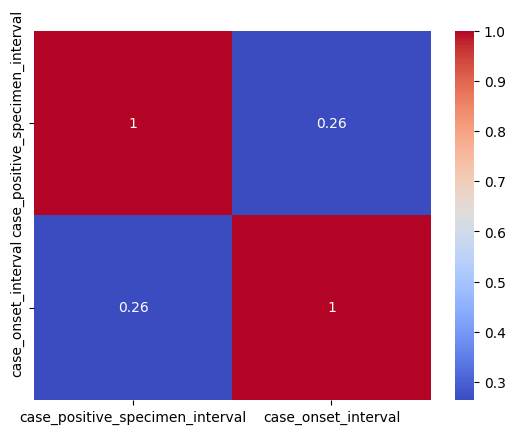

In [17]:
# Calculate correlations
corr_matrix = train_df[continuous_features].corr()
# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

## ☞ Low correlation between 2 categorical features

## 1.2 Continuous features' interaction with the target feature 

(a plot for each pair of   continuous feature and target feature). Discuss what you observe from these plots, e.g., which continuous features seem to be better at predicting the target feature? Choose a subset of continuous features you find promising (if any). Justify your choices.

## 1.3 Categorical features' pairwise interaction with the target feature 

Discuss what  knowledge you gain from these plots, e.g., which categorical features seem to be better at predicting the target feature? Choose a subset of categorical features you find promising (if any). Justify your choices.

# 2. [15] Predictive Modeling: Linear Regression.  

## 2.1 On the training set, train a linear regression model to predict the target feature, using only the  descriptive features selected in exercise (1) above. q

## 2.2 Print the coefficients learned by the model and discuss their role in the model 

(e.g., interpret the model by analysing each coefficient and how it relates each input feature to the target feature)

## 2.3 Print the predicted target feature value for the first 10 training examples. 

Threshold the predicted target feature value given by the linear regression model at 0.5, to get the predicted class for each example. Print the predicted class for the first 10 examples. Print a few classification evaluation measures computed on the full training set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1) and discuss your findings so far.

## 2.4 Evaluate the model using classification evaluation measures on the hold-out (30% examples) test set. 

Compare these results with the evaluation results obtained on the training (70%) dataset. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset). You can use classic k-fold cross-validation or repeated random train/test (70/30) splits. Compare the cross-validation metrics to those obtained on the single train/test split and discuss your findings.